In [295]:
import pandas as pd
df=pd.read_csv("obesity_data.csv")

In [296]:
print(df)

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0     56    Male  173.575262  71.982051  23.891783                      4   
1     69    Male  164.127306  89.959256  33.395209                      2   
2     46  Female  168.072202  72.930629  25.817737                      4   
3     32    Male  168.459633  84.886912  29.912247                      3   
4     60    Male  183.568568  69.038945  20.487903                      3   
..   ...     ...         ...        ...        ...                    ...   
995   18    Male  155.588674  64.103182  26.480345                      4   
996   35  Female  165.076490  97.639771  35.830783                      1   
997   49  Female  156.570956  78.804284  32.146036                      1   
998   64    Male  164.192222  57.978115  21.505965                      4   
999   66  Female  178.537130  74.962164  23.517168                      1   

    ObesityCategory  
0     Normal weight  
1             Obese  
2        

In [297]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [298]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


hatalı (nan gibi) değerler yok o yüzden kayıp verilerin tespiti ve dönüşümünü atlayıp veri tipi dönüşümüne geçiyorum

In [300]:
#eğer hatalı veriler olsaydı:
print(df.isna().sum())# hatalı değerlerin oluduğu sütunları kontrol ediyorum

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


df['sütun_adı'] = df['sütun_adı'].fillna(df['sütun_adı'].mean())
sonuç değerleri bozulmasın diye hatalı değerleri ortalama olarak doldururdum veya direkt silerdim bu csv için

In [302]:
print(df.dtypes) # veri tiplerini kontrol ediyorum

Age                        int64
Gender                    object
Height                   float64
Weight                   float64
BMI                      float64
PhysicalActivityLevel      int64
ObesityCategory           object
dtype: object


burada gender sütunu kategorik yapmam gerektiğini anlıyorum
 donusum={"ODA_NO":int,
        "DEP_ADI":str,
        "EK_TEDAVI":str,
        "U_TEDAVI":int,
       "C_SAYISI":int,
        "ALAN":int,
        "FIYAT":int}

df=df.astype(donusum)
print(df.dtypes) başka değiştirmem gereken bir tip olsaydı bu kodu kullanarak değiştirirdim 

In [304]:
df = pd.get_dummies(df, columns=["Gender"]) #kategorik yapıyorum
print(df)

     Age      Height     Weight        BMI  PhysicalActivityLevel  \
0     56  173.575262  71.982051  23.891783                      4   
1     69  164.127306  89.959256  33.395209                      2   
2     46  168.072202  72.930629  25.817737                      4   
3     32  168.459633  84.886912  29.912247                      3   
4     60  183.568568  69.038945  20.487903                      3   
..   ...         ...        ...        ...                    ...   
995   18  155.588674  64.103182  26.480345                      4   
996   35  165.076490  97.639771  35.830783                      1   
997   49  156.570956  78.804284  32.146036                      1   
998   64  164.192222  57.978115  21.505965                      4   
999   66  178.537130  74.962164  23.517168                      1   

    ObesityCategory  Gender_Female  Gender_Male  
0     Normal weight          False         True  
1             Obese          False         True  
2        Overweight  

In [305]:
print(df.duplicated())  #tekrarlanan veri var mı diye kontrol ediyorum

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [306]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Age, Height, Weight, BMI, PhysicalActivityLevel, ObesityCategory, Gender_Female, Gender_Male]
Index: []


tekrarlayan verilerin varlığını kontrol ettikten sonra aşırı veri var mı yok mu ortalama,
ortanca ,standart sapma değerlerini kullanarak kontrol ediyorum

In [307]:
import numpy as np

print(df["Height"].mean())
print(df["Height"].std())
print(np.median(df.Height))

170.05241692306717
10.309970795149903
169.80166537248084


In [308]:
print(df["Weight"].mean())
print(df["Weight"].std())
print(np.median(df.Weight))

71.20576903878789
15.509849315947378
71.9290717998748


In [309]:
print(df["BMI"].mean())
print(df["BMI"].std())
print(np.median(df.BMI))

24.888316768452263
6.19391244257365
24.69864656152483


In [310]:
print(df["Age"].mean())
print(df["Age"].std())
print(np.median(df.Age))

49.857
18.114267240981007
50.0


değerlerin normal olduğunu görüyorum ve normalizasyona geçiyorum

In [311]:
dfScaler = df.loc[:, "Height":"BMI"]
x = (dfScaler - np.min(dfScaler)) / (np.max(dfScaler) - np.min(dfScaler))
print(x)


       Height    Weight       BMI
0    0.855690  0.329162  0.079924
1    0.806724  0.422333  0.129177
2    0.827170  0.334078  0.089905
3    0.829178  0.396044  0.111126
4    0.907483  0.313909  0.062282
..        ...       ...       ...
995  0.762471  0.288328  0.093340
996  0.811644  0.462138  0.141800
997  0.767562  0.364520  0.122703
998  0.807061  0.256583  0.067559
999  0.881406  0.344607  0.077982

[1000 rows x 3 columns]


regressiona geçiyoruz

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
from scipy import stats

df_numeric = df.select_dtypes(include=[np.number])
z = np.abs(stats.zscore(df_numeric))
print(z)

          Age    Height    Weight       BMI  PhysicalActivityLevel
0    0.339295  0.341864  0.050076  0.160970               1.313943
1    1.057320  0.574985  1.209739  1.374115               0.478612
2    0.213033  0.192164  0.111266  0.150129               1.313943
3    0.986291  0.154567  0.882535  0.811514               0.417665
4    0.560226  1.311635  0.139776  0.710797               0.417665
..        ...       ...       ...       ...                    ...
995  1.759549  1.403591  0.458170  0.257160               1.313943
996  0.820593  0.482874  1.705189  1.767533               1.374890
997  0.047334  1.308268  0.490161  1.172337               1.374890
998  0.781156  0.568685  0.853282  0.546350               1.313943
999  0.891622  0.823374  0.242315  0.221481               1.374890

[1000 rows x 5 columns]


artık değerlin sonuçlarını yorumlamak için yazdırıyorum

In [281]:
print("mlr",r2_score(y_test,mlr_pred),mean_absolute_percentage_error(y_test,mlr_pred))
print("dt",r2_score(y_test,dt_pred),mean_absolute_percentage_error(y_test,dt_pred))
print("rf",r2_score(y_test,rf_pred),mean_absolute_percentage_error(y_test,rf_pred))

mlr 0.9844731184291917 0.02340883357623715
dt 0.9781835404403378 0.025211248372821893
rf 0.993627611180928 0.01381549200132482


değerlerin aşırıya kaçtığı satırları siliyorum ama ortalama ile de doldurabilirdim

In [314]:
print(np.where (z>3))

(array([134, 134, 311, 368, 529, 529, 650, 994], dtype=int64), array([2, 3, 3, 1, 1, 3, 2, 3], dtype=int64))


In [315]:
selected=df.iloc[np.where (z>3)[0]].index
print(selected)

Index([134, 134, 311, 368, 529, 529, 650, 994], dtype='int64')


In [316]:
dfN=df.drop(selected,axis=0,inplace=True)

In [317]:
dfN=df
print(dfN.shape) 

(994, 8)


In [318]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
plr_model = LinearRegression()
plr_model.fit(X_poly, y_train)
plr_pred = plr_model.predict(poly.transform(X_test))

print("PLR R2:", r2_score(y_test, plr_pred))
print("PLR MAPE:", mean_absolute_percentage_error(y_test, plr_pred))
print("PLR MAE:", mean_absolute_error(y_test, plr_pred))

PLR R2: 0.9999970449257978
PLR MAPE: 0.00031849673062316227
PLR MAE: 0.006946851961478489


In [319]:
print("mlr MAE:", mean_absolute_error(y_test, mlr_pred))
print("dt MAE:", mean_absolute_error(y_test, dt_pred))
print("rf MAE:", mean_absolute_error(y_test, rf_pred))

mlr MAE: 0.4963534794455462
dt MAE: 0.5829799233430084
rf MAE: 0.28866663115978586


In [321]:
print("mlr MAPE:", mean_absolute_percentage_error(y_test, mlr_pred))
print("dt MAPE:", mean_absolute_percentage_error(y_test, dt_pred))
print("rf MAPE:", mean_absolute_percentage_error(y_test, rf_pred))

mlr MAPE: 0.02340883357623715
dt MAPE: 0.025211248372821893
rf MAPE: 0.01381549200132482


In [322]:
print("mlr MSE:", mean_squared_error(y_test, mlr_pred))
print("dt MSE:", mean_squared_error(y_test, dt_pred))
print("rf MSE:", mean_squared_error(y_test, rf_pred))

mlr MSE: 0.5516420684716263
dt MSE: 0.7750994186009699
rf MSE: 0.22639946941228237


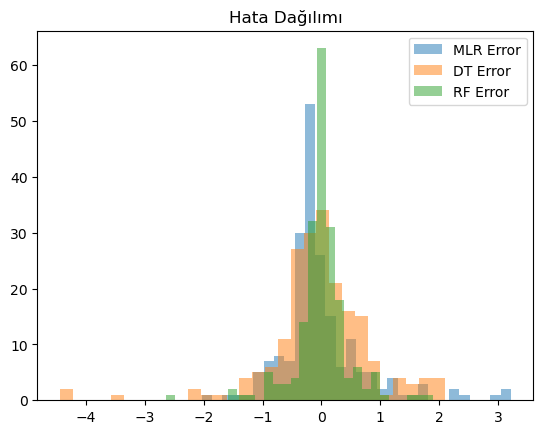

In [323]:
import matplotlib.pyplot as plt

plt.hist(y_test - mlr_pred, bins=30, alpha=0.5, label="MLR Error")
plt.hist(y_test - dt_pred, bins=30, alpha=0.5, label="DT Error")
plt.hist(y_test - rf_pred, bins=30, alpha=0.5, label="RF Error")
plt.legend()
plt.title("Hata Dağılımı")
plt.show()


Genel Yorum:
En iyi performans, Polynomial Regression olduğunu düşünüyorum özellikle düşük MAPE ve yüksek R2 değerleri var ama Random Forest daha düşük hata oranları olduğundan onu da seçmek kötü bir fikir değil.